In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#loading data
data = pd.read_csv(r"C:\Users\pylaa\Desktop\data_season.csv")
data.head()

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeilds,Humidity,Crops,price,Season
0,2004,Mangalore,1279,2903.1,27.0,Alluvial,Drip,2570.0,57.0,Coconut,200000,Kharif
1,2004,Mangalore,13283,2903.1,27.0,Alluvial,Drip,27170.0,57.5,Coconut,4847,Kharif
2,2004,Mangalore,52119,2903.1,27.0,Alluvial,Drip,114744.0,57.0,Coconut,51239,Kharif
3,2004,Mangalore,725,2996.6,27.0,Alluvial,Drip,1402.0,55.0,Coconut,216396,Kharif
4,2004,Mangalore,12885,2996.6,27.0,Alluvial,Drip,23456.0,56.0,Coconut,2644,Kharif


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         3158 non-null   int64  
 1   Location     3158 non-null   object 
 2   Area         3158 non-null   int64  
 3   Rainfall     3158 non-null   float64
 4   Temperature  3158 non-null   float64
 5   Soil type    3100 non-null   object 
 6   Irrigation   3158 non-null   object 
 7   yeilds       3158 non-null   float64
 8   Humidity     3158 non-null   float64
 9   Crops        3158 non-null   object 
 10  price        3158 non-null   int64  
 11  Season       3158 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 296.2+ KB


In [4]:
#checking for columns with missing values
for col in data.columns:
    missing_count = data[col].isnull().sum()
    pct_missing = (data[col].isnull().mean()) * 100
    dtype = data[col].dtype
    print(f'{col} |  {dtype} | Missing: {missing_count} ({pct_missing:.2f}%)')

Year |  int64 | Missing: 0 (0.00%)
Location |  object | Missing: 0 (0.00%)
Area |  int64 | Missing: 0 (0.00%)
Rainfall |  float64 | Missing: 0 (0.00%)
Temperature |  float64 | Missing: 0 (0.00%)
Soil type |  object | Missing: 58 (1.84%)
Irrigation |  object | Missing: 0 (0.00%)
yeilds |  float64 | Missing: 0 (0.00%)
Humidity |  float64 | Missing: 0 (0.00%)
Crops |  object | Missing: 0 (0.00%)
price |  int64 | Missing: 0 (0.00%)
Season |  object | Missing: 0 (0.00%)


In [5]:
data.columns = data.columns.str.lower().str.replace(" ", "_")

In [6]:
data.rename(columns={"yeilds": "yields"}, inplace=True)

In [7]:
data["soil_type"].fillna("Unknown", inplace=True)

C:\Users\pylaa\AppData\Local\Temp\ipykernel_6504\1923722016.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["soil_type"].fillna("Unknown", inplace=True)


In [8]:
data["year"] = data["year"].astype(int)

In [9]:
#Yield per hectare
data["yield_per_area"] = data["yields"] / data["area"]

#Revenue proxy
data["estimated_revenue"] = data["yields"] * data["price"]

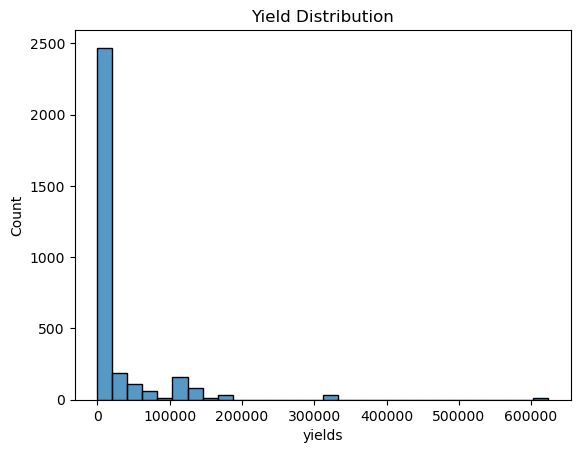

In [10]:
#Yield Distribution
sns.histplot(data["yields"], bins=30)
plt.title("Yield Distribution")
plt.show()

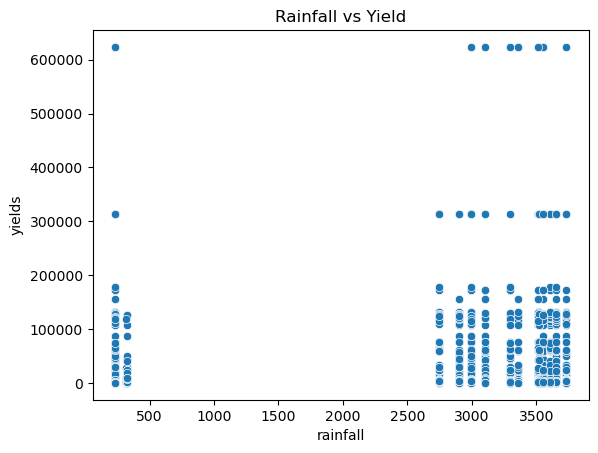

In [11]:
#Climate vs Yield
sns.scatterplot(x="rainfall", y="yields", data=data)
plt.title("Rainfall vs Yield")
plt.show()

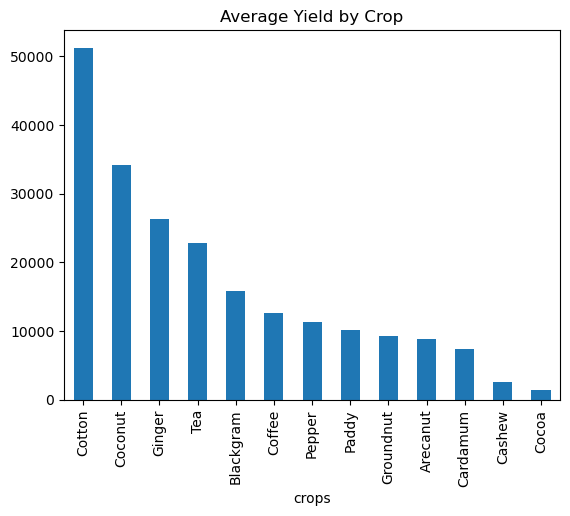

In [12]:
#Yield by Crop
data.groupby("crops")["yields"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Average Yield by Crop")
plt.show()

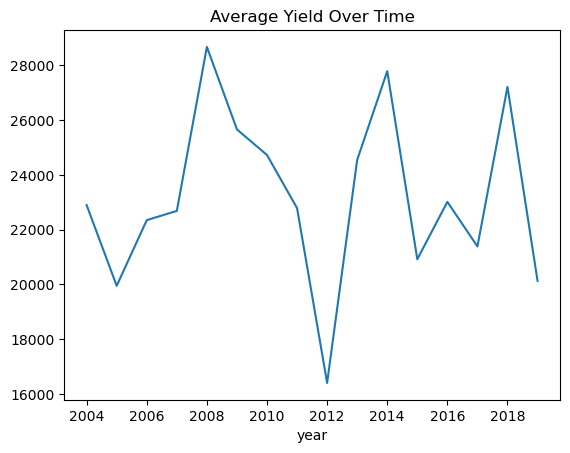

In [13]:
#Time Trend
data.groupby("year")["yields"].mean().plot()
plt.title("Average Yield Over Time")
plt.show()

In [14]:
#Correlation
data[["rainfall","temperature","humidity","yields","price"]].corr()

,rainfall,temperature,humidity,yields,price
rainfall,1.000000,0.018750,-0.018110,-0.031512,-0.002419
temperature,0.018750,1.000000,-0.004332,0.028306,-0.000124
humidity,-0.018110,-0.004332,1.000000,0.008222,-0.028590
yields,-0.031512,0.028306,0.008222,1.000000,-0.018486
price,-0.002419,-0.000124,-0.028590,-0.018486,1.000000


In [15]:
data

,year,location,area,rainfall,temperature,soil_type,irrigation,yields,humidity,crops,price,season,yield_per_area,estimated_revenue
0,2004,Mangalore,1279,2903.1,27.0,Alluvial,Drip,2570.0,57.0,Coconut,200000,Kharif,2.009382,5.140000e+08
1,2004,Mangalore,13283,2903.1,27.0,Alluvial,Drip,27170.0,57.5,Coconut,4847,Kharif,2.045472,1.316930e+08
2,2004,Mangalore,52119,2903.1,27.0,Alluvial,Drip,114744.0,57.0,Coconut,51239,Kharif,2.201577,5.879368e+09
3,2004,Mangalore,725,2996.6,27.0,Alluvial,Drip,1402.0,55.0,Coconut,216396,Kharif,1.933793,3.033872e+08
4,2004,Mangalore,12885,2996.6,27.0,Alluvial,Drip,23456.0,56.0,Coconut,2644,Kharif,1.820411,6.201766e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3153,2013,Davangere,46990,3296.0,27.0,Unknown,Drip,107809.0,53.5,Coconut,51239,Rabi,2.294297,5.524025e+09
3154,2014,Davangere,103,3296.0,27.0,Unknown,Drip,1132.0,52.5,Coconut,216396,Rabi,10.990291,2.449603e+08
3155,2015,Davangere,8239,3550.0,27.0,Unknown,Drip,23960.0,56.0,Coconut,2644,Rabi,2.908120,6.335024e+07
3156,2016,Davangere,44563,3550.0,27.0,Unknown,Drip,126487.0,57.0,Coconut,44235,Rabi,2.838386,5.595152e+09


In [16]:
data.to_csv('agric_data.csv', index=False)